In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('/content/gdrive/My Drive/Ml_project/onlinefraud.csv')
#dataset link--> https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.shape

(6362620, 11)

<h3> Features </h3>

<ul>
<li>oldbalanceOrg: represents a unit of time where 1 oldbalanceOrg equals 1 hour </li>
<li>type: type of online transaction </li>
<li>amount: the amount of the transaction</li>
<li>nameOrig: customer starting the transaction</li>
<li>oldbalanceOrg: balance before the transaction</li>
<li>newbalanceOrig: balance after the transaction</li>
<li>nameDest: recipient of the transaction</li>
<li>oldbalanceDest: initial balance of recipient before the transaction</li>
<li>newbalanceDest: the new balance of recipient after the transaction</li>
<li>isFraud: fraud transaction</li>
</ul>

<h1> Data Cleaning </h1>

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [8]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
Q1 = np.percentile(data['amount'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(data['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

<ipython-input-9-28ca11eac03c>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['amount'], 25,
<ipython-input-9-28ca11eac03c>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['amount'], 75,


In [10]:
IQR

195331.935

In [11]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [12]:
upper = np.where(data['amount'] >= (Q3+1.5*IQR))
lower = np.where(data['amount'] <= (Q1-1.5*IQR))

In [13]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [14]:
data.step

0            1
1            1
2            1
3            1
4            1
          ... 
6362609    742
6362610    742
6362611    742
6362614    743
6362615    743
Name: step, Length: 6024543, dtype: int64

<h1> Explortary data analysis </h1>

In [15]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362609    CASH_OUT
6362610    TRANSFER
6362611    CASH_OUT
6362614    TRANSFER
6362615    CASH_OUT
Name: type, Length: 6024543, dtype: object

In [17]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
data.type.value_counts()

CASH_OUT    2185250
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: type, dtype: int64

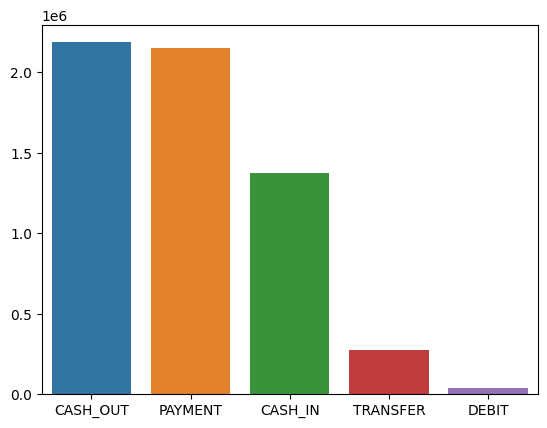

In [19]:
sb.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)
plt.show()

<p> It can be seen that CASH_OUT and PAYMENT are the most transaction type </p>

In [20]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06
mean,2.433126e+02,1.115342e+05,8.619578e+05,8.859128e+05,9.871264e+05,1.037883e+06,7.235404e-04,3.319754e-07
std,1.422881e+02,1.203984e+05,2.933836e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688897e-02,5.761730e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236855e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317584e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017194e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
data.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: amount, Length: 6024543, dtype: float64

In [23]:
data.oldbalanceOrg.describe()

count    6.024543e+06
mean     8.619578e+05
std      2.933836e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.514600e+04
75%      1.134380e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

In [24]:
data.newbalanceOrig.describe()

count    6.024543e+06
mean     8.859128e+05
std      2.969976e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.602874e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

In [22]:
data[['oldbalanceOrg', 'newbalanceOrig']].corr()

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.999514
newbalanceOrig,0.999514,1.000000


<b>The sampling distribution shows a strong positive correlation between the balance before transaction and balance after transaction  and that's mean <span style = 'color : blueviolet'>The higher the account balance => the higher the transfer balance  </span> </b>

In [26]:
data['balance_diff'] = data.oldbalanceOrg - data.newbalanceOrig

In [27]:
data.balance_diff.describe()

count    6.024543e+06
mean    -2.395505e+04
std      9.888992e+04
min     -5.017180e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.776675e+03
max      5.016732e+05
Name: balance_diff, dtype: float64

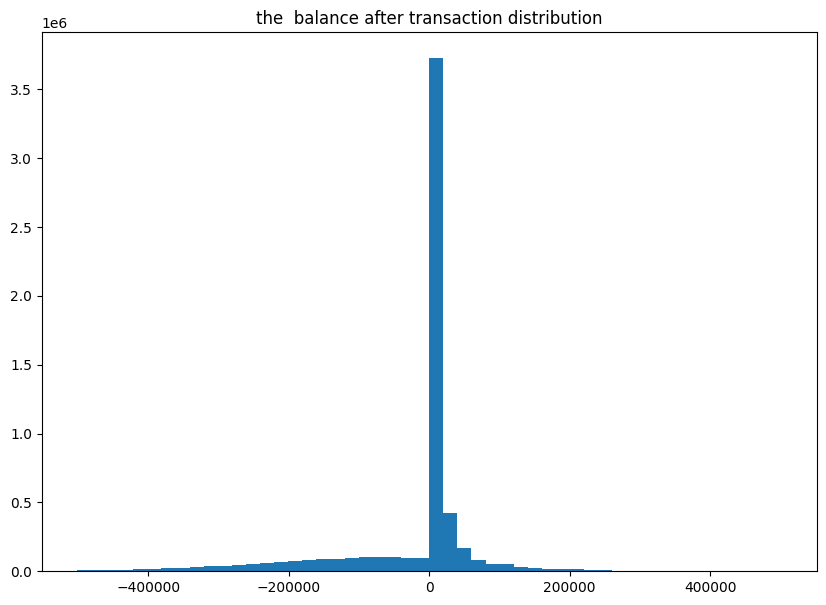

In [ ]:
plt.figure(figsize = [10,7])
plt.hist(data.balance_diff, bins=50)
plt.title('the  balance after transaction distribution')
plt.show()

In [ ]:
data.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


let's see the nameDest which is the id of the distination client

In [ ]:
data.nameDest.describe()

count         6024543
unique        2716238
top       C1286084959
freq               91
Name: nameDest, dtype: object

<h1> Data Preprocessing </h1>

In [28]:
data.isFraud.value_counts()

0    6020184
1       4359
Name: isFraud, dtype: int64

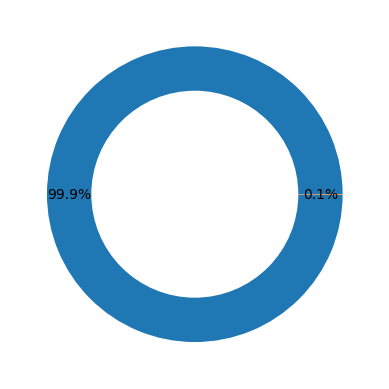

In [29]:
plt.pie(data.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

<b>The fraud data is very very small, fraud cases are about <span style = 'color : red'>0.1% </span> so to avoid any missclassifications we will balance the dataset and for doing so we will be undersampling the data </b>

<center>
<img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png" alt="Girl in a jacket" width="500" height="600">

In [30]:
# class count
class_count_0, class_count_1 = data['isFraud'].value_counts()

# Separate class
class_0 = data[data['isFraud'] == 0]
class_1 = data[data['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6020184, 12)
class 1: (4359, 12)


total class of 1 and0: 0    4359
1    4359
Name: isFraud, dtype: int64


<Axes: title={'center': 'count (target)'}>

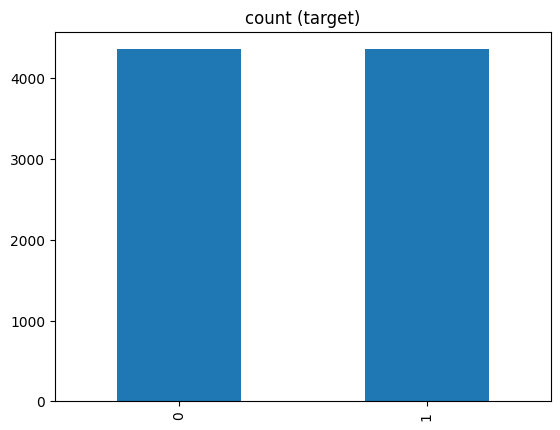

In [31]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [32]:
balancing_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
1494549,142,PAYMENT,21766.91,C836078027,21089.00,0.00,M810789163,0.00,0.00,0,0,21089.00
2674830,210,CASH_IN,263370.22,C1040434047,62257.00,325627.22,C2072517681,175834.03,0.00,0,0,-263370.22
1793891,162,PAYMENT,10622.27,C290961412,0.00,0.00,M2007629542,0.00,0.00,0,0,0.00
2928902,229,PAYMENT,11117.77,C684609792,41835.00,30717.23,M1884677595,0.00,0.00,0,0,11117.77
6032353,474,PAYMENT,18317.65,C2043879493,19322.88,1005.23,M1773021634,0.00,0.00,0,0,18317.65
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,339682.13


In [33]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 1494549 to 6362615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8718 non-null   int64  
 1   type            8718 non-null   object 
 2   amount          8718 non-null   float64
 3   nameOrig        8718 non-null   object 
 4   oldbalanceOrg   8718 non-null   float64
 5   newbalanceOrig  8718 non-null   float64
 6   nameDest        8718 non-null   object 
 7   oldbalanceDest  8718 non-null   float64
 8   newbalanceDest  8718 non-null   float64
 9   isFraud         8718 non-null   int64  
 10  isFlaggedFraud  8718 non-null   int64  
 11  balance_diff    8718 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 885.4+ KB


In [34]:
balancing_data.type.unique()

array(['PAYMENT', 'CASH_IN', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

<b>to include the type into our algorithm we need to mapping it</b>

In [35]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})


In [36]:
balancing_data.type.dtype

dtype('int64')

<b> let's making our X and y variables and split the data into train-test split </b>

In [37]:
balancing_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balance_diff'],
      dtype='object')

In [38]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [39]:
X

array([[ 2.0000000e+00,  2.1766910e+04,  2.1089000e+04,  0.0000000e+00,
         2.1089000e+04],
       [ 3.0000000e+00,  2.6337022e+05,  6.2257000e+04,  3.2562722e+05,
        -2.6337022e+05],
       [ 2.0000000e+00,  1.0622270e+04,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       ...,
       [ 1.0000000e+00,  6.3416990e+04,  6.3416990e+04,  0.0000000e+00,
         6.3416990e+04],
       [ 4.0000000e+00,  3.3968213e+05,  3.3968213e+05,  0.0000000e+00,
         3.3968213e+05],
       [ 1.0000000e+00,  3.3968213e+05,  3.3968213e+05,  0.0000000e+00,
         3.3968213e+05]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

splitting the data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape,X_test.shape

((6974, 5), (1744, 5))

Data Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.22383137e+00 1.41865875e+05 5.29586710e+05 4.53860846e+05
 7.57258636e+04]


In [42]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

:<h1> APPLYING THE ALGORITHM </h1>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [44]:
models = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
}

In [45]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9542586750788643
Testing Accuracy: 0.9547018348623854
Testing Confusion Matrix: 
[[807  70]
 [  9 858]]
Recall Score :  0.9547018348623854
Precision Score :  0.9547018348623854
Testing F-1: 0.9547018348623854
Testing F-Beta: 0.9547018348623855
------------------------------
Training Model RF 
--------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may 

Training Accuracy: 1.0
Testing Accuracy: 0.9913990825688074
Testing Confusion Matrix: 
[[865  12]
 [  3 864]]
Recall Score :  0.9913990825688074
Precision Score :  0.9913990825688074
Testing F-1: 0.9913990825688074
Testing F-Beta: 0.9913990825688074
------------------------------
Training Model XGB 
--------------
Training Accuracy: 0.9964152566676227
Testing Accuracy: 0.9913990825688074
Testing Confusion Matrix: 
[[867  10]
 [  5 862]]
Recall Score :  0.9913990825688074
Precision Score :  0.9913990825688074
Testing F-1: 0.9913990825688074
Testing F-Beta: 0.9913990825688074
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may 

<b> We can clearly see that XGBoost is the most suitable algorithm for the given dataset with : </b>
    <br>
    <span style = 'color : red'>* Accuracy : 99% </span>
    <br>
    <span style = 'color : Green'>* F1 score : 99% </span>   

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.66%


In [ ]:
rounded_y = np.round(y_pred)
unique_val = pd.DataFrame(y_test)
unique_val[0].unique()

array([1, 0])

**Multiple confusion matrix**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique_val[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[875,   2],
        [  4, 863]],

       [[863,   4],
        [  2, 875]]])

In [ ]:
data.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


Prediction

In [ ]:
if  model.predict([[2,9839.64,170136.0,160296.36,9839.64]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

not Fraud
